In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
#from sklearn.externals import joblib
import time
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
city = 'CityA'

data_path = '../../data/output/' + city + '/normalized_data_X.csv'
y_path = '../../data/output/' + city + '/y_headway.csv'

data = pd.read_csv(data_path)
y = pd.read_csv(y_path)
print(data.shape)
print(y.shape)
data.head()

(1432633, 420)
(1432633, 2)


,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,alertTypeSB_ACCIDENT,alertTypeSB_CHIT_CHAT,alertTypeSB_HAZARD,alertTypeSB_JAM,alertTypeSB_NORMAL,alertTypeSB_POLICE,alertTypeSB_ROAD_CLOSED,jamBlockTypeSB_-,jamBlockTypeSB_NORMAL,jamBlockTypeSB_ROAD_CLOSED_EVENT
0,0.118068,0.066667,0.085019,0.264600,0.496150,0.057584,0.0,0.000000,0.266155,0.496047,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.118068,0.066667,0.085026,0.270218,0.501802,0.064231,0.0,0.000148,0.271812,0.501642,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.118068,0.066667,0.085033,0.273653,0.505296,0.068301,0.0,0.000000,0.275187,0.505192,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.118068,0.066667,0.085039,0.277433,0.509404,0.072900,0.0,0.000149,0.280622,0.510132,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.118068,0.066667,0.085053,0.280050,0.513166,0.077983,0.0,0.000155,0.281878,0.513178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
y.head()

,headway,headwayThreshold
0,85.0,5.0
1,90.0,5.0
2,99.0,5.0
3,116.0,5.0
4,116.0,5.0


In [4]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data, y.headway, test_size=0.20, random_state=7)

## Linear Regression

In [5]:
random.seed(42)

start = time.time()
model = LinearRegression()
model.fit(train_X, train_Y)
end = time.time()

pred_array = model.predict(test_X)
preds_pd = pd.DataFrame(pred_array, columns=['pred'])
preds_pd.to_csv('../../Ensemble model/Ensemble/outputs/q7/rli_pred_q7_' + city + '.csv', index=False)

In [6]:
print("Execution time: " + str((end - start)/60) + " min") #CityA

Execution time: 0.6822965542475382 min


In [22]:
print("Execution time: " + str((end - start)/60) + " min") #Curitiba

Execution time: 0.8325146079063416 min


In [7]:
#prediction time

one_test = test_X.iloc[[0], :]

start = time.time() 
pred_one = model.predict(one_test)
end = time.time()

In [8]:
print("Prediction execution time: " + str(end - start) + " sec") #CityA

Prediction execution time: 0.004679679870605469 sec


In [24]:
print("Prediction execution time: " + str(end - start) + " sec") #Curitiba

Prediction execution time: 0.004739999771118164 sec


### Evaluating model

In [27]:
pred_array

array([18.14965497, 21.04649788, 26.95378612, ..., 15.05821941,
       34.14382803, 25.15670186])

In [28]:
pred = []
for p in pred_array:
    pred.append(p)
    
pred

[18.14965496796598,
 21.046497876071108,
 26.953786122076565,
 34.64894434795698,
 29.81331388960995,
 25.821366699321523,
 16.449575670794836,
 18.684675380861535,
 20.705722481745696,
 32.585824364473886,
 20.954140448517244,
 38.73634604487782,
 28.464930096003684,
 19.750138554391825,
 20.102225522813825,
 31.120161152688965,
 11.456893670615145,
 29.98967598952158,
 24.855253994628754,
 23.350110506525013,
 34.3508313309504,
 33.4978544365679,
 28.884477048958622,
 20.168830367562677,
 19.998154151296085,
 18.932418936155372,
 30.012232741997366,
 15.672636716647553,
 14.37663093459021,
 20.841839810010804,
 27.725221789639846,
 24.153331067088594,
 17.982021075259468,
 19.27757984186603,
 33.947898137122046,
 38.66242963900926,
 13.974523476118264,
 13.501981019841779,
 30.910252052062866,
 18.121228718989663,
 24.11488390321413,
 22.069263052772925,
 26.19230337067672,
 29.934809922554194,
 12.931807989146009,
 21.70581214267525,
 29.54025671795206,
 31.006079027878258,
 32.7344

In [29]:
alpha = y.headwayThreshold[test_Y.index]
alpha

1920043    5.0
5289617    5.0
4196126    5.0
770317     5.0
972255     5.0
          ... 
3776245    5.0
5077650    3.0
4324995    5.0
1298671    5.0
737152     6.0
Name: headwayThreshold, Length: 1242314, dtype: float64

In [30]:
test_Y

1920043    19.0
5289617    26.0
4196126    73.0
770317     26.0
972255     16.0
           ... 
3776245    34.0
5077650    11.0
4324995    13.0
1298671    45.0
737152     12.0
Name: headway, Length: 1242314, dtype: float64

In [31]:
bb_pred = np.less_equal(pred, alpha)
bb_label = np.less_equal(test_Y, alpha)

In [32]:
bb_pred

1920043    False
5289617    False
4196126    False
770317     False
972255     False
           ...  
3776245    False
5077650    False
4324995    False
1298671    False
737152     False
Name: headwayThreshold, Length: 1242314, dtype: bool

In [33]:
bb_label

1920043    False
5289617    False
4196126    False
770317     False
972255     False
           ...  
3776245    False
5077650    False
4324995    False
1298671    False
737152     False
Length: 1242314, dtype: bool

In [34]:
# Headway
accuracy = accuracy_score(bb_label, bb_pred)
precision = precision_score(bb_label, bb_pred)
recall = recall_score(bb_label, bb_pred)
f_measure = f1_score(bb_label, bb_pred)

In [35]:
# Curitiba
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9469715385965223
Precision: 0.8086257107197338
Recall: 0.0829103214890017
F-measure: 0.1503997936548878


In [10]:
# CityA
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.8683300352148314
Precision: 0.5445492662473794
Recall: 0.13466573346812868
F-measure: 0.21593199908556227


In [12]:
# CityA - 5p - 1day
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.8736495671460256
Precision: 0.3459500378501135
Recall: 0.3362766740250184
F-measure: 0.3410447761194029


### Update to calculate p-value

In [4]:
X = sm.add_constant(train_X)
linear_model = sm.OLS(train_Y, X) # Linear Regression/Ordinary Least Squares
result = linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                headway   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     910.2
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:48:56   Log-Likelihood:            -5.6540e+06
No. Observations:             1146106   AIC:                         1.131e+07
Df Residuals:                 1145735   BIC:                         1.131e+07
Df Model:                         370                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [5]:
var_values = pd.DataFrame(data=result.pvalues.sort_values(), columns=['p-value'])
var_values.reset_index(inplace=True)
var_values = var_values.rename(columns = {'index':'variable'})
var_values.head(20)

,variable,p-value
0,tripNumSB,0.000000e+00
1,GPShour,0.000000e+00
2,tripNum,2.398083e-126
3,gpsPointId,3.313414e-16
4,busCodeSB,4.652685e-11
5,gpsPointIdSB,7.610928e-10
6,precipitationSB,1.095586e-09
7,distanceToShapePointSB,5.002447e-08
8,distanceToShapePoint,2.545055e-06
9,alertLongitude,2.774738e-06


Text(0.5, 0, 'p-value')

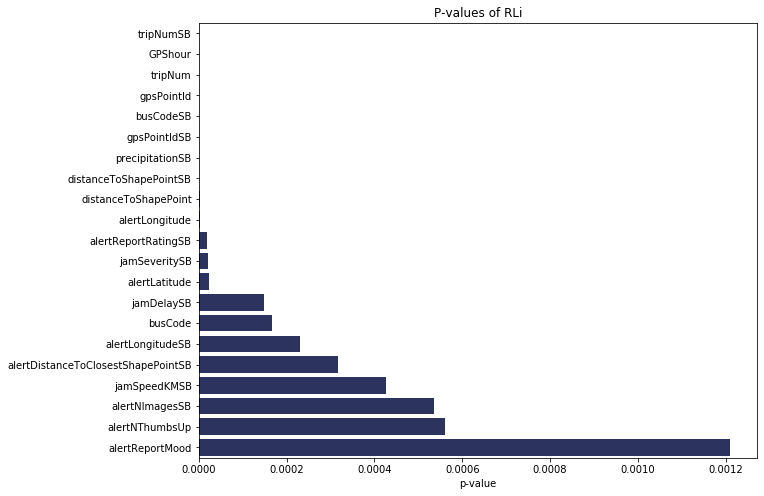

In [7]:
#100%
fig, ax = plt.subplots(figsize=(10,8))

first_rows=var_values[0:21]
fig_plt = sns.barplot(y="variable", x='p-value', data=first_rows, color='#242d66', ax=ax)

fig_plt.set_title('P-values of RLi')
fig_plt.set_ylabel('')
fig_plt.set_xlabel('p-value')

#fig.savefig('../data/figs/events_distribution_horiz.png', bbox_inches = "tight")

In [4]:
#5p

X = sm.add_constant(train_X)
linear_model = sm.OLS(train_Y, X) # Linear Regression/Ordinary Least Squares
result = linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                headway   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:24:37   Log-Likelihood:            -2.8695e+05
No. Observations:               55907   AIC:                         5.744e+05
Df Residuals:                   55670   BIC:                         5.765e+05
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/home/veruska/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/veruska/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/veruska/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/veruska/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [5]:
var_values = pd.DataFrame(data=result.pvalues.sort_values(), columns=['p-value'])
var_values.reset_index(inplace=True)
var_values = var_values.rename(columns = {'index':'variable'})
print(var_values.shape)
var_values.head(20)

(420, 2)


,variable,p-value
0,tripNum,0.000000e+00
1,tripNumSB,0.000000e+00
2,GPShour,0.000000e+00
3,alertSubtype_JAM_STAND_STILL_TRAFFIC,6.218815e-66
4,alertTypeSB_ACCIDENT,2.523873e-64
5,alertSubtype_JAM_HEAVY_TRAFFIC,3.368783e-61
6,alertTypeSB_JAM,6.476921e-61
7,alertSubtypeSB_ACCIDENT_MINOR,1.253073e-53
8,alertSubtype_JAM_MODERATE_TRAFFIC,9.741951e-52
9,alertSubtype_-,1.293458e-47


In [6]:
var_values[var_values['p-value'] <= 0.05]

,variable,p-value
0,tripNum,0.000000e+00
1,tripNumSB,0.000000e+00
2,GPShour,0.000000e+00
3,alertSubtype_JAM_STAND_STILL_TRAFFIC,6.218815e-66
4,alertTypeSB_ACCIDENT,2.523873e-64
...,...,...
241,MONTH(alertDateTime),2.915080e-02
242,shapeId_Route_183,3.192113e-02
243,shapeId_Route_182,3.864150e-02
244,shapeId_Route_213,4.153870e-02


In [7]:
var_values[246:]

,variable,p-value
246,shapeId_Route_212,0.051145
247,problemSB_BETWEEN,0.051433
248,shapeId_Route_175,0.052892
249,alertSubtypeSB_POLICE_HIDING,0.056830
250,shapeId_Route_174,0.060536
...,...,...
415,alertSubtypeSB_HAZARD_WEATHER,NaN
416,alertSubtypeSB_HAZARD_WEATHER_FOG,NaN
417,alertSubtypeSB_ROAD_CLOSED_EVENT,NaN
418,alertTypeSB_ROAD_CLOSED,NaN


In [8]:
var_values['p-value'] = var_values['p-value'].map(lambda x: '%.5f' % x)
var_values

,variable,p-value
0,tripNum,0.00000
1,tripNumSB,0.00000
2,GPShour,0.00000
3,alertSubtype_JAM_STAND_STILL_TRAFFIC,0.00000
4,alertTypeSB_ACCIDENT,0.00000
...,...,...
415,alertSubtypeSB_HAZARD_WEATHER,nan
416,alertSubtypeSB_HAZARD_WEATHER_FOG,nan
417,alertSubtypeSB_ROAD_CLOSED_EVENT,nan
418,alertTypeSB_ROAD_CLOSED,nan


In [12]:
var_values[0:20]

,variable,p-value
0,tripNum,0.00000
1,tripNumSB,0.00000
2,GPShour,0.00000
3,alertSubtype_JAM_STAND_STILL_TRAFFIC,0.00000
4,alertTypeSB_ACCIDENT,0.00000
5,alertSubtype_JAM_HEAVY_TRAFFIC,0.00000
6,alertTypeSB_JAM,0.00000
7,alertSubtypeSB_ACCIDENT_MINOR,0.00000
8,alertSubtype_JAM_MODERATE_TRAFFIC,0.00000
9,alertSubtype_-,0.00000


Text(0.5, 0, 'p-value')

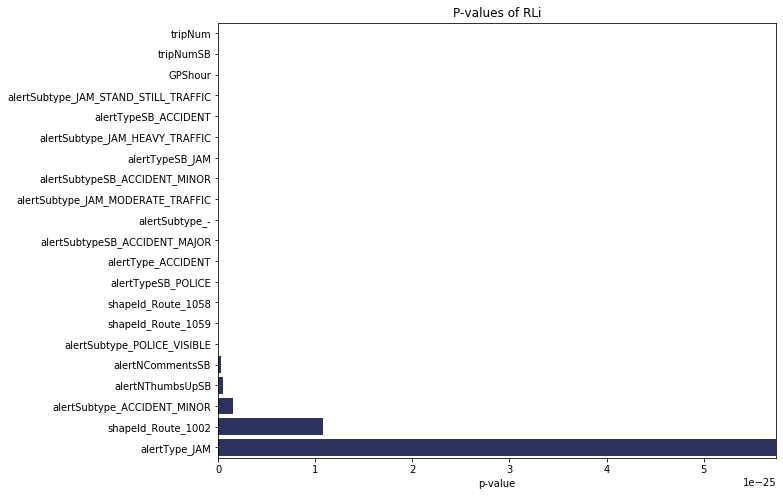

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

first_rows=var_values[0:21]
fig_plt = sns.barplot(y="variable", x='p-value', data=first_rows, color='#242d66', ax=ax)

fig_plt.set_title('P-values of RLi')
fig_plt.set_ylabel('')
fig_plt.set_xlabel('p-value')

fig.savefig('p-values_horiz.png', bbox_inches = "tight")

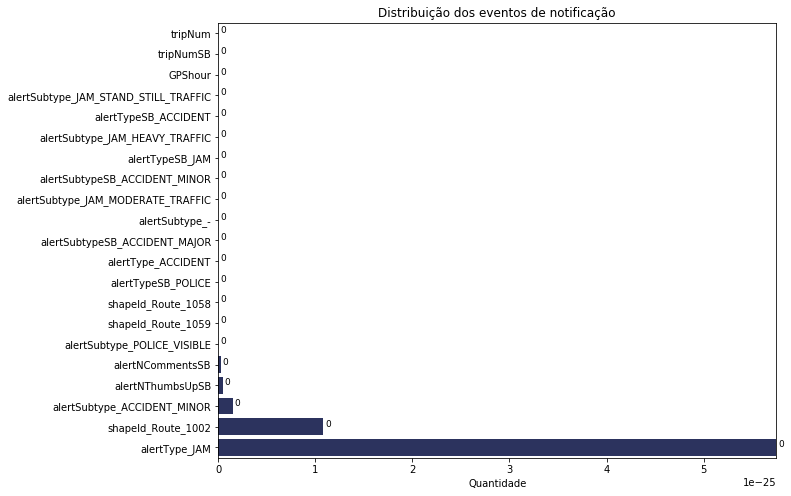

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

first_rows=var_values[0:21]
fig_plt = sns.barplot(y="variable", x='p-value', data=first_rows, color='#242d66', ax=ax)

fig_plt.set_title('Distribuição dos eventos de notificação')
fig_plt.set_ylabel('')
fig_plt.set_xlabel('Quantidade')

for p in fig_plt.patches:
    fig_plt.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(2, -8),
                     fontsize=9, textcoords='offset points')

#fig.savefig('../data/figs/events_distribution_horiz.png', bbox_inches = "tight")